In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
le = LabelEncoder()

import os
path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv", )
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [3]:
train['It became a relationship'] = train['It became a relationship'].astype('int')

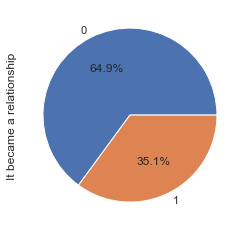

In [4]:
train['It became a relationship'].value_counts().plot.pie(autopct='%1.1f%%')

---
# Preprocessing

In [5]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [6]:
ID = 'ID'
target = 'It became a relationship'

cat_cols = ['Segment type', 'Segment Description', 'Answer']

In [7]:
#train['Segment Description'] = train['Segment Description'].apply(lambda x: x.replace(',', ''))

manual_index = test[ test['Segment type'] == 'web' ].index

In [8]:
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

#df = pd.get_dummies(data = df, columns=cat_cols, drop_first=True)

In [9]:
# For LGBM
#for feature in cat_cols:
#    df[feature] = pd.Series(df[feature], dtype="category")

In [10]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop=True)

In [11]:
features = [col for col in test_proc.columns if col not in [target]]

In [12]:
trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999)

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]

In [13]:
model_dict = {}

model_dict['Logistic Regression'] = LogisticRegression(max_iter = 1000)
model_dict['Decision Tree'] = DecisionTreeClassifier(random_state = 1)
model_dict['Extra Trees'] = ExtraTreesClassifier(random_state = 1)
model_dict['Random Forest'] = RandomForestClassifier(random_state = 1)
model_dict['AdaBoost'] = AdaBoostClassifier(random_state = 1)
model_dict['Bagging'] = BaggingClassifier(random_state = 1)
model_dict['XGBoost'] = XGBClassifier(random_state = 1, objective = 'binary:logistic')
model_dict['LGBM'] = LGBMClassifier(random_state = 1)
model_dict['Cat'] = CatBoostClassifier(verbose=False, random_state =1)

In [14]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    print()

In [15]:
for model_name,model in model_dict.items():
    model_test(X_trn, X_val, y_trn, y_val, model, model_name)

======================================Logistic Regression=======================================
Score is : 0.6236842105263158

======================================Decision Tree=======================================
Score is : 0.9026315789473685

======================================Extra Trees=======================================
Score is : 0.9105263157894737

======================================Random Forest=======================================
Score is : 0.9210526315789473

======================================AdaBoost=======================================
Score is : 0.9078947368421053

======================================Bagging=======================================
Score is : 0.9131578947368421



C:\Users\sunil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
======================================XGBoost=======================================
Score is : 0.9131578947368421

======================================LGBM=======================================
Score is : 0.9105263157894737

======================================Cat=======================================
Score is : 0.9263157894736842



---

In [16]:
#params = {'depth': 7, 'n_estimators': 626, 'learning_rate': 0.016302944206998182}
#params = {'depth': 7, 'n_estimators': 482, 'learning_rate': 0.01728237593909604}
#params = {'depth': 11, 'n_estimators': 471, 'learning_rate': 0.3425147657925661}
#params = {'depth': 6, 'n_estimators': 414, 'learning_rate': 0.49569206773990965}
clf = CatBoostClassifier(random_state=42, cat_features=cat_cols, task_type='GPU')

clf.fit(train_proc[features], train_proc[target])
val = clf.predict(train_proc[features])
print(f"accuracy_score is {accuracy_score(train_proc[target], val)}")
preds = clf.predict(X_test[features])

Learning rate set to 0.032546
0:	learn: 0.6551941	total: 46.6ms	remaining: 46.6s
1:	learn: 0.6202748	total: 98.8ms	remaining: 49.3s
2:	learn: 0.6000719	total: 150ms	remaining: 50s
3:	learn: 0.5716305	total: 201ms	remaining: 50.1s
4:	learn: 0.5545171	total: 253ms	remaining: 50.3s
5:	learn: 0.5313806	total: 306ms	remaining: 50.7s
6:	learn: 0.5199282	total: 350ms	remaining: 49.6s
7:	learn: 0.5080660	total: 402ms	remaining: 49.9s
8:	learn: 0.4964786	total: 452ms	remaining: 49.7s
9:	learn: 0.4875401	total: 486ms	remaining: 48.1s
10:	learn: 0.4796465	total: 523ms	remaining: 47s
11:	learn: 0.4712428	total: 574ms	remaining: 47.3s
12:	learn: 0.4358521	total: 624ms	remaining: 47.4s
13:	learn: 0.4063272	total: 679ms	remaining: 47.8s
14:	learn: 0.3875443	total: 735ms	remaining: 48.3s
15:	learn: 0.3647818	total: 790ms	remaining: 48.6s
16:	learn: 0.3445807	total: 842ms	remaining: 48.7s
17:	learn: 0.3271920	total: 896ms	remaining: 48.9s
18:	learn: 0.3113562	total: 947ms	remaining: 48.9s
19:	learn: 0.

162:	learn: 0.1154400	total: 8.18s	remaining: 42s
163:	learn: 0.1153514	total: 8.23s	remaining: 41.9s
164:	learn: 0.1152387	total: 8.28s	remaining: 41.9s
165:	learn: 0.1152140	total: 8.31s	remaining: 41.8s
166:	learn: 0.1151883	total: 8.36s	remaining: 41.7s
167:	learn: 0.1151808	total: 8.41s	remaining: 41.6s
168:	learn: 0.1135534	total: 8.46s	remaining: 41.6s
169:	learn: 0.1134943	total: 8.51s	remaining: 41.5s
170:	learn: 0.1134715	total: 8.55s	remaining: 41.5s
171:	learn: 0.1133888	total: 8.6s	remaining: 41.4s
172:	learn: 0.1131913	total: 8.65s	remaining: 41.4s
173:	learn: 0.1118956	total: 8.71s	remaining: 41.4s
174:	learn: 0.1118501	total: 8.74s	remaining: 41.2s
175:	learn: 0.1118309	total: 8.78s	remaining: 41.1s
176:	learn: 0.1115318	total: 8.84s	remaining: 41.1s
177:	learn: 0.1113675	total: 8.89s	remaining: 41.1s
178:	learn: 0.1112796	total: 8.94s	remaining: 41s
179:	learn: 0.1112608	total: 8.98s	remaining: 40.9s
180:	learn: 0.1112435	total: 9.03s	remaining: 40.9s
181:	learn: 0.111

324:	learn: 0.0957244	total: 15.9s	remaining: 32.9s
325:	learn: 0.0953848	total: 15.9s	remaining: 32.9s
326:	learn: 0.0953834	total: 15.9s	remaining: 32.8s
327:	learn: 0.0953319	total: 16s	remaining: 32.8s
328:	learn: 0.0952753	total: 16s	remaining: 32.7s
329:	learn: 0.0952713	total: 16.1s	remaining: 32.7s
330:	learn: 0.0952712	total: 16.1s	remaining: 32.6s
331:	learn: 0.0951016	total: 16.2s	remaining: 32.5s
332:	learn: 0.0948563	total: 16.2s	remaining: 32.5s
333:	learn: 0.0948553	total: 16.3s	remaining: 32.5s
334:	learn: 0.0948365	total: 16.3s	remaining: 32.4s
335:	learn: 0.0948245	total: 16.4s	remaining: 32.4s
336:	learn: 0.0948241	total: 16.4s	remaining: 32.3s
337:	learn: 0.0948015	total: 16.5s	remaining: 32.3s
338:	learn: 0.0947985	total: 16.5s	remaining: 32.2s
339:	learn: 0.0947735	total: 16.6s	remaining: 32.1s
340:	learn: 0.0947715	total: 16.6s	remaining: 32.1s
341:	learn: 0.0947255	total: 16.6s	remaining: 32s
342:	learn: 0.0946552	total: 16.7s	remaining: 32s
343:	learn: 0.094617

487:	learn: 0.0911288	total: 23.7s	remaining: 24.9s
488:	learn: 0.0910862	total: 23.7s	remaining: 24.8s
489:	learn: 0.0910855	total: 23.8s	remaining: 24.8s
490:	learn: 0.0909985	total: 23.9s	remaining: 24.7s
491:	learn: 0.0909815	total: 23.9s	remaining: 24.7s
492:	learn: 0.0906738	total: 24s	remaining: 24.6s
493:	learn: 0.0906732	total: 24s	remaining: 24.6s
494:	learn: 0.0906292	total: 24s	remaining: 24.5s
495:	learn: 0.0906286	total: 24.1s	remaining: 24.5s
496:	learn: 0.0906280	total: 24.1s	remaining: 24.4s
497:	learn: 0.0906274	total: 24.2s	remaining: 24.4s
498:	learn: 0.0905644	total: 24.2s	remaining: 24.3s
499:	learn: 0.0905228	total: 24.3s	remaining: 24.3s
500:	learn: 0.0905198	total: 24.3s	remaining: 24.2s
501:	learn: 0.0904783	total: 24.4s	remaining: 24.2s
502:	learn: 0.0904587	total: 24.4s	remaining: 24.1s
503:	learn: 0.0904580	total: 24.5s	remaining: 24.1s
504:	learn: 0.0904534	total: 24.5s	remaining: 24s
505:	learn: 0.0904320	total: 24.6s	remaining: 24s
506:	learn: 0.0904313	

649:	learn: 0.0874164	total: 30.8s	remaining: 16.6s
650:	learn: 0.0873508	total: 30.9s	remaining: 16.5s
651:	learn: 0.0873490	total: 30.9s	remaining: 16.5s
652:	learn: 0.0873489	total: 30.9s	remaining: 16.4s
653:	learn: 0.0873164	total: 31s	remaining: 16.4s
654:	learn: 0.0873088	total: 31s	remaining: 16.3s
655:	learn: 0.0873087	total: 31.1s	remaining: 16.3s
656:	learn: 0.0873086	total: 31.1s	remaining: 16.2s
657:	learn: 0.0873082	total: 31.1s	remaining: 16.2s
658:	learn: 0.0873080	total: 31.2s	remaining: 16.1s
659:	learn: 0.0872754	total: 31.2s	remaining: 16.1s
660:	learn: 0.0872551	total: 31.3s	remaining: 16s
661:	learn: 0.0872549	total: 31.3s	remaining: 16s
662:	learn: 0.0872548	total: 31.3s	remaining: 15.9s
663:	learn: 0.0872546	total: 31.4s	remaining: 15.9s
664:	learn: 0.0872477	total: 31.4s	remaining: 15.8s
665:	learn: 0.0872476	total: 31.4s	remaining: 15.8s
666:	learn: 0.0872474	total: 31.5s	remaining: 15.7s
667:	learn: 0.0872473	total: 31.5s	remaining: 15.7s
668:	learn: 0.087223

813:	learn: 0.0853832	total: 37.4s	remaining: 8.56s
814:	learn: 0.0853802	total: 37.5s	remaining: 8.51s
815:	learn: 0.0853789	total: 37.5s	remaining: 8.46s
816:	learn: 0.0853738	total: 37.6s	remaining: 8.41s
817:	learn: 0.0853736	total: 37.6s	remaining: 8.36s
818:	learn: 0.0853723	total: 37.6s	remaining: 8.32s
819:	learn: 0.0852186	total: 37.7s	remaining: 8.27s
820:	learn: 0.0852174	total: 37.7s	remaining: 8.22s
821:	learn: 0.0852162	total: 37.8s	remaining: 8.18s
822:	learn: 0.0852162	total: 37.8s	remaining: 8.13s
823:	learn: 0.0852160	total: 37.8s	remaining: 8.08s
824:	learn: 0.0852149	total: 37.9s	remaining: 8.03s
825:	learn: 0.0852149	total: 37.9s	remaining: 7.99s
826:	learn: 0.0851254	total: 38s	remaining: 7.94s
827:	learn: 0.0851252	total: 38s	remaining: 7.89s
828:	learn: 0.0851084	total: 38.1s	remaining: 7.85s
829:	learn: 0.0851006	total: 38.1s	remaining: 7.8s
830:	learn: 0.0850995	total: 38.1s	remaining: 7.76s
831:	learn: 0.0850968	total: 38.2s	remaining: 7.71s
832:	learn: 0.085

974:	learn: 0.0837236	total: 44.4s	remaining: 1.14s
975:	learn: 0.0837236	total: 44.4s	remaining: 1.09s
976:	learn: 0.0837236	total: 44.5s	remaining: 1.05s
977:	learn: 0.0837236	total: 44.5s	remaining: 1s
978:	learn: 0.0837210	total: 44.5s	remaining: 956ms
979:	learn: 0.0837210	total: 44.6s	remaining: 910ms
980:	learn: 0.0837208	total: 44.6s	remaining: 865ms
981:	learn: 0.0837060	total: 44.7s	remaining: 819ms
982:	learn: 0.0837060	total: 44.7s	remaining: 774ms
983:	learn: 0.0837060	total: 44.8s	remaining: 728ms
984:	learn: 0.0837060	total: 44.8s	remaining: 682ms
985:	learn: 0.0837059	total: 44.8s	remaining: 637ms
986:	learn: 0.0837059	total: 44.9s	remaining: 591ms
987:	learn: 0.0837059	total: 44.9s	remaining: 545ms
988:	learn: 0.0837059	total: 44.9s	remaining: 500ms
989:	learn: 0.0837058	total: 45s	remaining: 454ms
990:	learn: 0.0837054	total: 45s	remaining: 409ms
991:	learn: 0.0837053	total: 45.1s	remaining: 363ms
992:	learn: 0.0836865	total: 45.1s	remaining: 318ms
993:	learn: 0.08367

In [17]:
subdf = pd.DataFrame(preds, columns=['prediction']) 

index = test[ test['Segment type'] == 'web' ].index
subdf.loc[index] = 0

subdf['prediction'] = subdf['prediction'].astype('int')
subdf.to_csv(path + '\\sub1.csv', index=False)           

---
# End

%%time

import optuna 
from sklearn.metrics import * 
from sklearn.model_selection import *
from catboost import CatBoostClassifier
from xgboost import XGBRegressor
import numpy as np


def objective(trial):
  param = {
      "depth": trial.suggest_int("depth", 1, 12),
      "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
      "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.9),
      #"l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 3),
      #"subsample": trial.suggest_float("subsample", 0.1, 1),
      #'colsample_bylevel': trial.suggest_float('colsample_bylevel,', 0.1, 1),
      #'random_strength':trial.suggest_int('random_strength', 0, 1) 
  }

#   skf = StratifiedKFold(n_splits = 2, shuffle=True, random_state=1999) 
#   stratified_target = pd.qcut( train_proc[target], 10, labels=False, duplicates='drop')
#   oofs = np.zeros(train.shape[0])
#   for fold, (tr_ind, val_ind) in enumerate(skf.split(train_proc, stratified_target)): 

#     X_train, X_val     = train_proc[features].loc[tr_ind], train_proc[features].loc[val_ind]
#     y_train, y_val     = train_proc[features].loc[tr_ind], train_proc[features].loc[val_ind] 
    
#     model              = CatBoostClassifier(**param, random_state=1)       
    
#     model.fit(X_train, y_train, cat_features=cat_cols, early_stopping_rounds = 200)  

#     val_pred           = model.predict(X_val)
#     accuracy           = accuracy_score(y_val, val_pred)
#     oofs[val_ind]       = val_pred
#     print(f"Fold{fold+1} Accuracy is {accuracy}")
  model = CatBoostClassifier(**params, random_state=1)
  model.fit(train_proc[features], train_proc[target])
  val = model.predict(train_proc[features])
  total_acc = accuracy_score(train_proc[target], val)
  return total_acc
  
study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=20)